In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def human_format(x):
    sigpart = 0
    suffix = ""
    if x < 1000:
        return "{:.3g}".format(x)
    elif x < 1000000:
        sigpart = x / 1000
        suffix = "k"
    elif x < 1000000000:
        sigpart = x / 1000000
        suffix = "M"
    else:
        sigpart = x / 1000000000
        suffix = "B"
    return "{:.3g}{}".format(sigpart, suffix)

In [4]:
df = pd.read_csv("../finalresults/druid.csv")

In [7]:
df

,Dataset,Sketch,Size,Time,Rows,Cells
0,milan1,sum,1,0.130,4829470.0,8.049117e+05
1,milan1,moments,10,0.670,4829470.0,8.049117e+05
2,milan1,stree,10,1.110,4829470.0,8.049117e+05
3,milan1,stree,100,3.330,4829470.0,8.049117e+05
4,milan1,stree,1000,25.990,4829470.0,8.049117e+05
5,milan5,sum,1,0.273,25800000.0,4.300000e+06
6,milan5,moments,10,1.700,25800000.0,4.300000e+06
7,milan5,stree,10,3.650,25800000.0,4.300000e+06
8,milan5,stree,100,12.100,25800000.0,4.300000e+06
9,milan5,stree,1000,99.000,25800000.0,4.300000e+06


In [8]:
datasets = ["milan5"]
datasetnames = [
    "Milan 5 Day"
]
sketches = [
    ("sum", 1),
    ("moments", 10),
    ("stree", 10),
    ("stree", 100),
    ("stree", 1000)
]
sketchnames = [
    "sum",
    "moments",
    "S-Hist:10",
    "S-Hist:100",
    "S-Hist:1000"
]
patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]

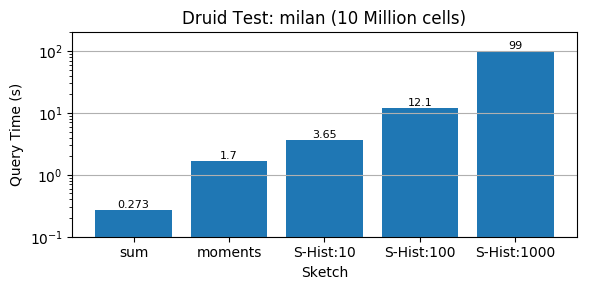

In [20]:
fig, ax = plt.subplots(figsize=(6,3), ncols=1, sharey=True, dpi=100)
for di in range(len(datasets)):
    dname = datasets[di]
    data = df[(df.Dataset == dname)]
    xlocs = np.arange(0, len(sketches))
    ys = data.Time
    ax.bar(
        xlocs,
        height=ys,
        log=True,
#         color = ["C0", "C1", "C2", "C3", "C4"]
    )
    rects = ax.patches
    for rect, label in zip(rects, ys):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width()/2, 
            height,
            human_format(label),
            ha='center', va='bottom', size = 8,
        )

    ax.set_xticks(xlocs)
    ax.set_xticklabels(sketchnames)
    ax.yaxis.grid(True)
    ax.set_title("Druid Test: milan (10 Million cells)")
    if di == 0:
        ax.set_ylabel("Query Time (s)")
    ax.set_ylim(0.1, 200)
    ax.set_xlabel("Sketch")
plt.tight_layout()
plt.savefig("druid.pdf")